# Fitting the galaxy rotational curves

In [1]:
from astropy import constants
from astropy import units
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize
import scipy as sc

In [2]:
path = "/home/rebeca/Dropbox/isya/project/rotation_curves/data/"

In [3]:
ngc0224, ngc1417 = np.loadtxt(path+"NGC_0224.dat"), np.loadtxt(path+"NGC_1417.dat")
ngc0224, ngc1417 = pd.DataFrame(ngc0224), pd.DataFrame(ngc1417)

ngc4321, ngc5055 = np.loadtxt(path+"NGC_4321.dat"), np.loadtxt(path+"NGC_5055.dat")
ngc4321, ngc5055 = pd.DataFrame(ngc4321), pd.DataFrame(ngc5055)

ngc1097, ngc3198, ngc4565 = np.loadtxt(path+"NGC_1097.dat"), np.loadtxt(path+"NGC_3198.dat"), np.loadtxt(path+"NGC_4565.dat")
ngc1097, ngc3198, ngc4565 = pd.DataFrame(ngc1097), pd.DataFrame(ngc3198), pd.DataFrame(ngc4565)

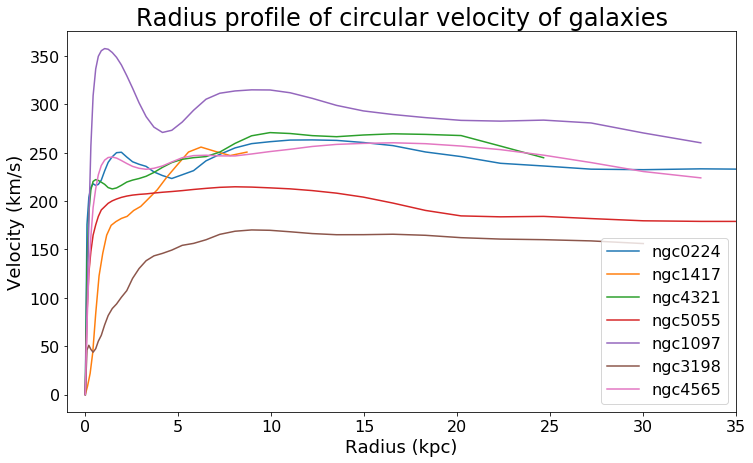

In [4]:
plt.figure(figsize=[12,7])
plt.plot(ngc0224[0], ngc0224[1],  label="ngc0224")
plt.plot(ngc1417[0], ngc1417[1],  label="ngc1417")
plt.plot(ngc4321[0], ngc4321[1],  label="ngc4321")
plt.plot(ngc5055[0], ngc5055[1],  label="ngc5055")
plt.plot(ngc1097[0], ngc1097[1],  label="ngc1097")
plt.plot(ngc3198[0], ngc3198[1],  label="ngc3198")
plt.plot(ngc4565[0], ngc4565[1],  label="ngc4565")

plt.title('Radius profile of circular velocity of galaxies', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)

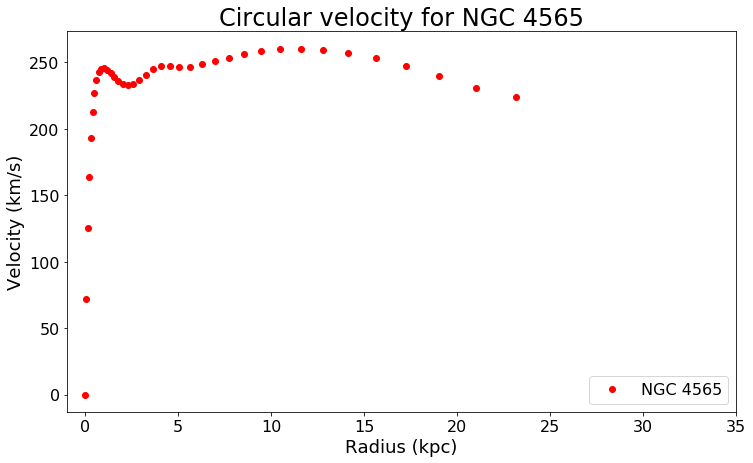

In [5]:
plt.figure(figsize=[12,7])
ngc4565[0] = ngc4565[0]*0.7
plt.plot(ngc4565[0], ngc4565[1], 'ro', label="NGC 4565")

plt.title('Circular velocity for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)

In [6]:
def hernquist(r, a, M):
    M = M * units.solMass
    r = r * units.kiloparsec
    a = a * units.kiloparsec
    return (np.sqrt(G * M * r) / (r + a)).to(units.kilometer/units.s)

# Dark matter halo profile

In [7]:
def hernquist_halo(r, ahalo, Mhalo):
    return ((43007.1 * Mhalo * r) / ((r + ahalo)**2))

In [8]:
hernquist_halo(10, 10, 100)

107517.75

In [9]:
np.sqrt(hernquist_halo(5, 10, 100))

309.1461358861426

In [10]:
p0 = np.array([10, 100])
raio = np.arange(0, 35)

In [11]:
# a, b = scipy.optimize.curve_fit(hernquist, ngc4565[0], ngc4565[1], p0, bounds=([5, 15], [5 * 10**11, 5 * 10**12]))

In [12]:
#a, b = scipy.optimize.curve_fit(hernquist_halo, ngc4565[0], ngc4565[1], p0, bounds=([0, 15], [10**11, 10**13]))

In [13]:
R = ngc4565[0][1:].values
vel2 = ngc4565[1][1:].values**2

In [14]:
ah, bh = scipy.optimize.curve_fit(hernquist_halo, R, vel2, p0)

In [15]:
ah

array([ 4.23241038, 29.07423069])

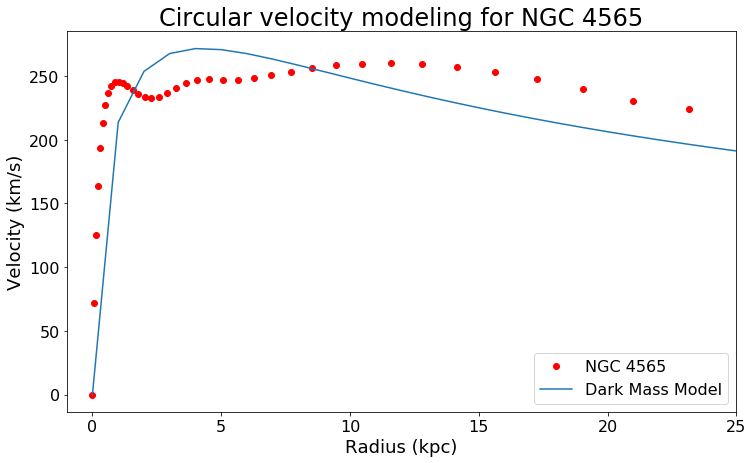

In [16]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, np.sqrt(hernquist_halo(raio, ah[0], ah[1])), label='Dark Mass Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,25])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)

# Disk profile

In [17]:
def disk(r, rd, Mdisk):
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    return ((43007.1 * Mdisk * r**2 * bessel) / (2. * (rd ** 3)))

In [18]:
disk(10, 3, 10)

48659.54660406336

In [19]:
np.sqrt(disk(10, 3, 10))

220.5890899479468

In [20]:
p0 = np.array([3, 100])

In [21]:
ad, bd = scipy.optimize.curve_fit(disk, R, vel2, p0)

In [22]:
ad

array([ 2.5902301 , 12.82905292])

In [23]:
disk_array = disk(raio, ad[0], ad[1])
disk_array[0] = 0

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


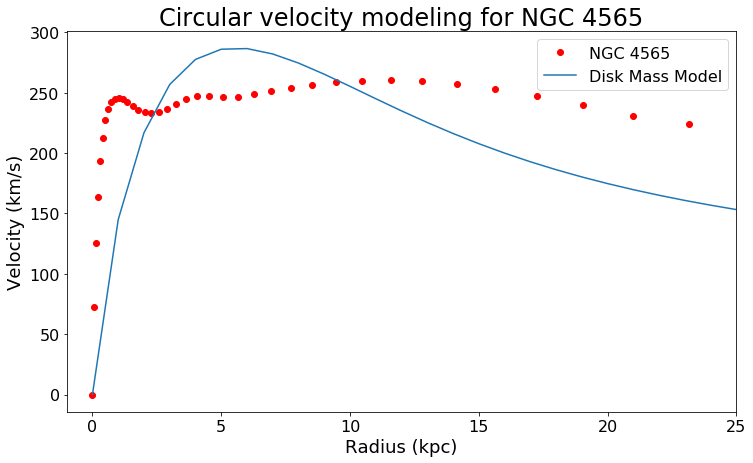

In [24]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, np.sqrt(disk_array), label='Disk Mass Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,25])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=0, fontsize=16)

# Bulge Profile

In [25]:
def hernquist_bulge(r, abulge, Mbulge):
    return (43007.1 * Mbulge * r) / ((r + abulge)**2)

In [26]:
hernquist_bulge(10, 5, 10)

19114.266666666666

In [27]:
np.sqrt(hernquist_bulge(10, 5, 10))

138.2543549645604

In [28]:
ab, bb = scipy.optimize.curve_fit(hernquist_bulge, R, vel2)

In [29]:
ab

array([ 4.23240746, 29.074211  ])

# Halo and Disk Profile

def halo_disk(r, ahalo, Mhalo):
    halo = (np.sqrt(4007.1 * Mhalo * r)) / ((r + ahalo))
    
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = (np.sqrt((4007.1 * Mdisk * r**2 * bessel) / (2. * rd ** 3)))

    return (halo**2) + (disk**2)

In [30]:
def halo_disk(r, ahalo, Mhalo):
    halo = ((43007.1 * Mhalo * r) / ((r + ahalo)**2))
    
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = ((43007.1 * Mdisk * r**2 * bessel) / (2. * (rd ** 3)))

    return halo + disk

# Fixing the disk mass

Rotation curve decomposition for size–mass relations of bulge, disk, and dark halo components in spiral galaxies, Yoshiaki SOFUE

Institute of Astronomy, The University of Tokyo

M_halo = 1.64 x 10^11 solar masses

In [31]:
Mdisk = 4.6
rd = 4.

In [32]:
p0 = np.array([ah[0], ah[1]])
p0

array([ 4.23241038, 29.07423069])

In [33]:
ahd, bhd = scipy.optimize.curve_fit(halo_disk, R, vel2, p0)

In [34]:
ahd

array([ 2.6073099 , 14.84006303])

In [35]:
np.sqrt(halo_disk(raio, ahd[0], ahd[1]))

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


array([         nan, 227.40803686, 258.63860204, 267.40174705,
       268.74621454, 266.88892433, 263.38212417, 258.92290251,
       253.88416863, 248.49662271, 242.91844087, 237.2648076 ,
       231.62193343, 226.05466088, 220.61122057, 215.32659457,
       210.22510867, 205.32253189, 200.62781762, 196.14455917,
       191.87220533, 187.80707004, 183.9431635 , 180.2728694 ,
       176.78748983, 173.47767774, 170.33377462, 167.34606918,
       164.50499094, 161.80125079, 159.22593898, 156.77058921,
       154.42721639, 152.18833413, 150.04695695])

In [36]:
halo_disk_array = halo_disk(raio, ahd[0], ahd[1])
halo_disk_array[0] = 0

disk_array = disk(raio, rd, Mdisk)
disk_array[0] = 0
disk_array

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


array([    0.        ,  2667.80516306,  6761.17875785, 10607.79616929,
       13747.33164419, 16087.54848182, 17681.84023564, 18638.28518582,
       19078.12353741, 19116.65268197, 18855.16249919, 18378.45596676,
       17755.14938004, 17039.25840633, 16272.26857002, 15485.26822361,
       14700.93389478, 13935.27635653, 13199.12093636, 12499.32998625,
       11839.79208178, 11222.20904434, 10646.71281073, 10112.34218772,
        9617.40619718,  9159.7569411 ,  8736.99119192,  8346.59649454,
        7986.05456168,  7652.91218144,  7344.82771585,  7059.59951237,
        6795.18112758,  6549.68712247,  6321.39228564])

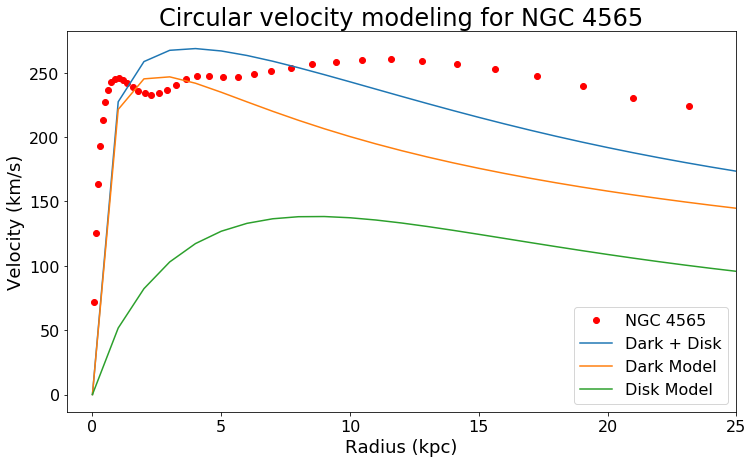

In [37]:
plt.figure(figsize=[12,7])
plt.plot(R, np.sqrt(vel2), 'ro', label='NGC 4565')
plt.plot(raio, np.sqrt(halo_disk_array), label='Dark + Disk')
plt.plot(raio, np.sqrt(hernquist_halo(raio, ahd[0], ahd[1])), label='Dark Model')
plt.plot(raio, np.sqrt(disk_array), label='Disk Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,25])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=0, fontsize=16)

# Halo Disk Bulge

In [38]:
def total(r, ahalo, Mhalo, abulge, Mbulge):
    halo = ((43007.1 * Mhalo * r) / ((r + ahalo)**2))
    
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = ((43007.1 * Mdisk * r**2 * bessel) / (2. * (rd ** 3)))
    
    bulge = ((43007.1 * Mbulge * r) / ((r + abulge)**2))

    return halo + disk + bulge

In [39]:
ahd[0], ahd[1], ab[0], ab[1]

(2.607309903972507, 14.840063025321069, 4.232407457686677, 29.07421100289037)

In [40]:
p0 = np.array([ahd[0], ahd[1], ab[0], ab[1]])

In [41]:
a, b = scipy.optimize.curve_fit(total, R, vel2, p0)

In [42]:
a

array([ 0.85079528,  3.81253427, 24.15605089, 87.17632326])

In [43]:
Mbulge = 6.4

def total(r, ahalo, Mhalo, abulge):
    halo = ((43007.1 * Mhalo * r) / ((r + ahalo)**2))
    
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = ((43007.1 * Mdisk * r**2 * bessel) / (2. * (rd ** 3)))
    
    bulge = ((43007.1 * Mbulge * r) / ((r + abulge)**2))

    return halo + disk + bulge

In [44]:
a, b = scipy.optimize.curve_fit(total, R, vel2)

In [45]:
a

array([ 68.45723186, 313.91595995,   1.29270524])

In [51]:
rd / 3

1.3333333333333333

In [52]:
abulge = rd / 3
Mbulge = 6.4


def total(r, ahalo, Mhalo):
    halo = ((43007.1 * Mhalo * r) / ((r + ahalo)**2))
    
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = ((43007.1 * Mdisk * r**2 * bessel) / (2. * (rd ** 3)))
    
    bulge = ((43007.1 * Mbulge * r) / ((r + abulge)**2))

    return halo + disk + bulge

In [53]:
a, b = scipy.optimize.curve_fit(total, R, vel2)

In [54]:
a

array([ 58.80372249, 248.28285774])

In [45]:
total = total(raio, a[0], a[1])
total[0] = 0
total

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


array([  0.        , 202.94398772, 245.76968002, 264.74737222,
       273.41905818, 276.74194413, 277.04139732, 275.5526266 ,
       272.98419811, 269.76449378, 266.16238445, 262.35119265,
       258.44468869, 254.51833318, 250.62230992, 246.78978606,
       243.04229312, 239.39331513, 235.85072867, 232.41848997,
       229.09781712, 225.88802765, 222.78713673, 219.7922869 ,
       216.90005778, 214.10668927, 211.40824213, 208.8007128 ,
       206.28011455, 203.84253415, 201.48417016, 199.20135806,
       196.9905855 , 194.84850046, 192.77191429])

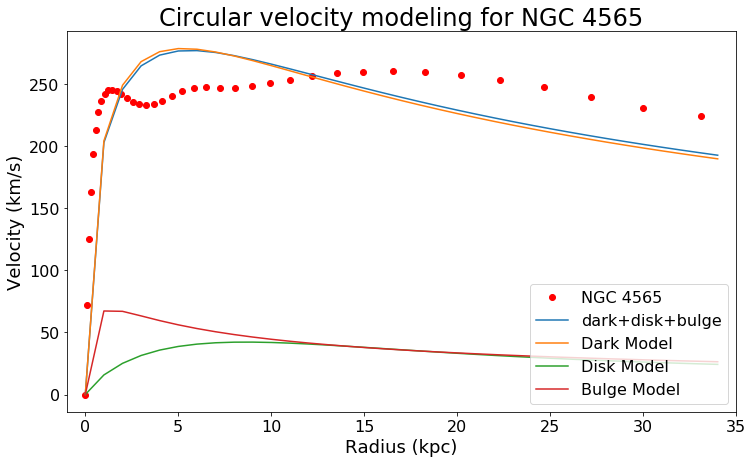

In [46]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, total, label='dark+disk+bulge')
plt.plot(raio, hernquist_halo(raio, ah[0], ah[1]), label='Dark Model')
plt.plot(raio, disk_array, label='Disk Model')
plt.plot(raio, hernquist_bulge(raio, abulge, Mbulge), label='Bulge Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)